# Gerekli kütüphanelerin yüklenmesi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import cifar10
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score,confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2,l1_l2
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Veri ön işleme

In [2]:
# veri setini yükleme
cifar10=tf.keras.datasets.cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [3]:
# sınıf etiketlerini oluşturma 
class_names = ['Uçak', 'Otomobil', 'Kuş', 'Kedi', 'Geyik',
               'Köpek', 'Kurbağa', 'At', 'Gemi', 'Kamyon']

In [4]:
print('Eğitim veri boyutu:', X_train.shape)
print('Eğitim etiket boyutu:', y_train.shape)
print('Test veri boyutu:', X_test.shape)
print('Test etiket boyutu:', y_test.shape)


Eğitim veri boyutu: (50000, 32, 32, 3)
Eğitim etiket boyutu: (50000, 1)
Test veri boyutu: (10000, 32, 32, 3)
Test etiket boyutu: (10000, 1)


In [46]:
# Eğitim veri setindeki görüntülerin boyutunu yazdırma
print("Eğitim veri setindeki görüntülerin boyutu:", X_train.shape[1:])

# Test veri setindeki görüntülerin boyutunu yazdırma
print("Test veri setindeki görüntülerin boyutu:", X_test.shape[1:])


Eğitim veri setindeki görüntülerin boyutu: (32, 32, 3)
Test veri setindeki görüntülerin boyutu: (32, 32, 3)


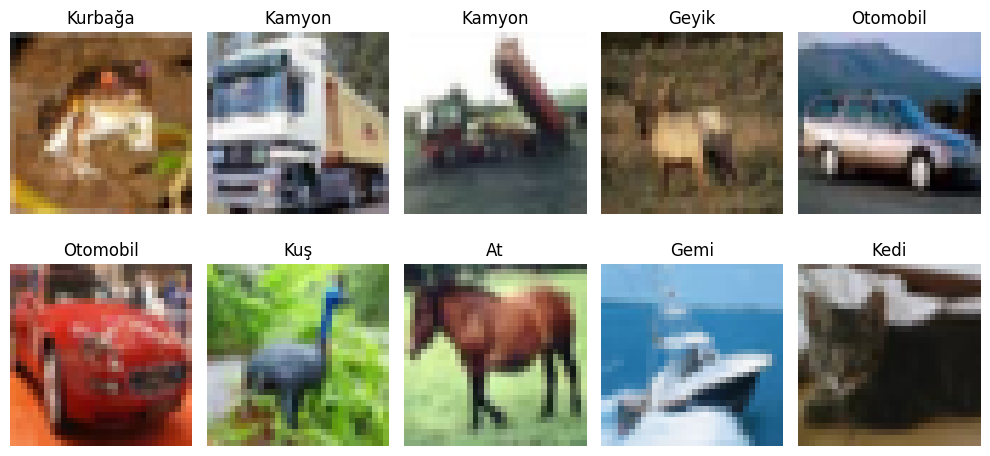

In [6]:
# İlk 10 görüntüyü görselleştirme
plt.figure(figsize=(10, 5))
for i in range(10):
    #2 satır ve 5 sütunluk bir alt grafik (subplot) düzeni 
    plt.subplot(2, 5, i + 1)
    # görüntüleri görselleştirme 
    plt.imshow(X_train[i])
    # görüntünün sınıf ismini başlık olarak ekleme
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')  # Eksenleri kapatma
plt.tight_layout()
plt.show()


In [7]:
# Verinin normalize edilmesi (0-255 arası değerleri 0-1 arası değerlere dönüştürme)
# Görüntü verilerinde her pikselin değeri 0 ile 255 arasında olduğu için, bu değerleri 0-1 aralığına dönüştürmek için her pikseli 255'e böleriz.
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [8]:
# Modeli oluşturma
# Veriyi düzleştirme ve yeniden şekillendirme
X_train = X_train.reshape(X_train.shape[0], -1) #(X_train = X_train.reshape(50000, 1024))
X_test = X_test.reshape(X_test.shape[0], -1)

In [9]:
# knn modeli
knn=KNeighborsClassifier().fit(X_train,y_train)
y_pred=knn.predict(X_test)

acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

print("Accuracy:",acc)
print("F1 score:",f1)
print("Recall:",acc)
print("Precision:",precision)

Accuracy: 0.3398
F1 score: 0.3260170986061005
Recall: 0.3398
Precision: 0.4304261825528496


In [10]:
# karmaşıklık matrisi
cm = confusion_matrix(y_test, y_pred)
cm

array([[537,   4, 117,  13,  59,   7,  26,   5, 225,   7],
       [139, 205, 110,  42, 155,  36,  61,  10, 217,  25],
       [107,   3, 452,  52, 226,  34,  66,   8,  49,   3],
       [ 70,   8, 234, 217, 193, 115,  95,  17,  46,   5],
       [ 64,   1, 262,  35, 514,  21,  41,   7,  53,   2],
       [ 71,   3, 227, 155, 187, 220,  66,  14,  51,   6],
       [ 27,   2, 273,  68, 314,  37, 248,   2,  28,   1],
       [ 93,  10, 181,  50, 280,  52,  53, 210,  67,   4],
       [141,  14,  52,  38,  54,  16,  14,   8, 655,   8],
       [153,  67,  98,  68, 124,  23,  46,  29, 252, 140]], dtype=int64)

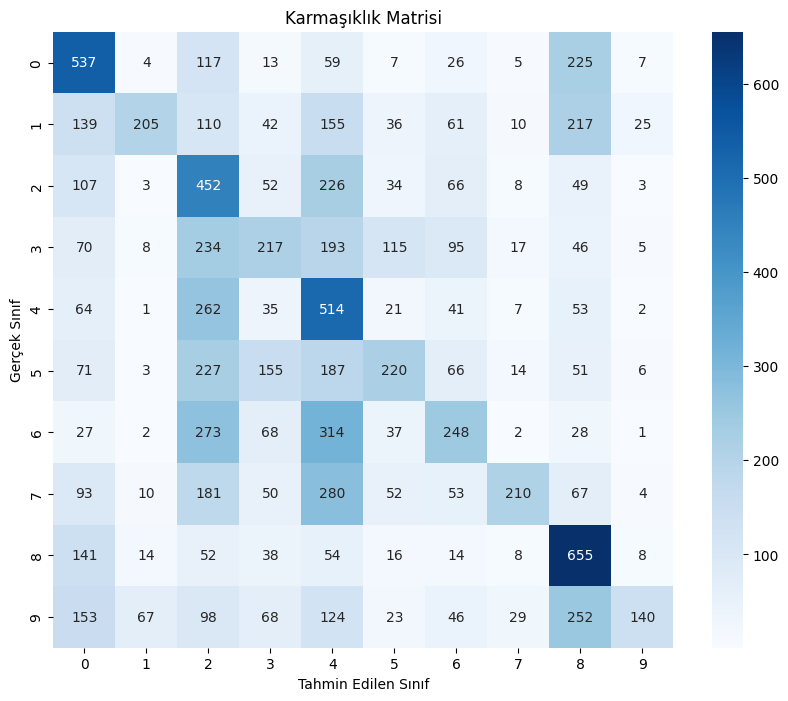

In [11]:
# karmaşıklık matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

In [12]:
# decision tree modeli oluşturma
dt=DecisionTreeClassifier().fit(X_train,y_train)

In [13]:
y_pred=dt.predict(X_test)

acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

In [14]:
print(f'Doğruluk (Accuracy): {acc:.4f}')
print(f'F1 Skoru: {f1:.4f}')
print(f'Geri Çağırma (Recall): {recall:.4f}')
print(f'Kesinlik (Precision): {precision:.4f}')

Doğruluk (Accuracy): 0.2673
F1 Skoru: 0.2669
Geri Çağırma (Recall): 0.2673
Kesinlik (Precision): 0.2667


In [15]:
# karmaşıklık matrisi
cm = confusion_matrix(y_test, y_pred)
cm

array([[352,  75,  91,  58,  63,  43,  33,  50, 162,  73],
       [ 56, 261,  75,  77,  62,  52,  58,  64, 120, 175],
       [101,  46, 216,  90, 144, 106, 114,  77,  46,  60],
       [ 72,  64, 110, 177, 106, 125, 129, 101,  49,  67],
       [ 63,  43, 160,  88, 232, 101, 124,  93,  44,  52],
       [ 52,  55, 114, 154,  90, 209, 106, 102,  65,  53],
       [ 42,  47, 130, 123, 142,  99, 280,  63,  35,  39],
       [ 71,  81,  80, 110,  94, 103,  62, 261,  63,  75],
       [151, 115,  47,  46,  49,  42,  29,  39, 384,  98],
       [ 89, 160,  54,  61,  41,  55,  67,  79,  93, 301]], dtype=int64)

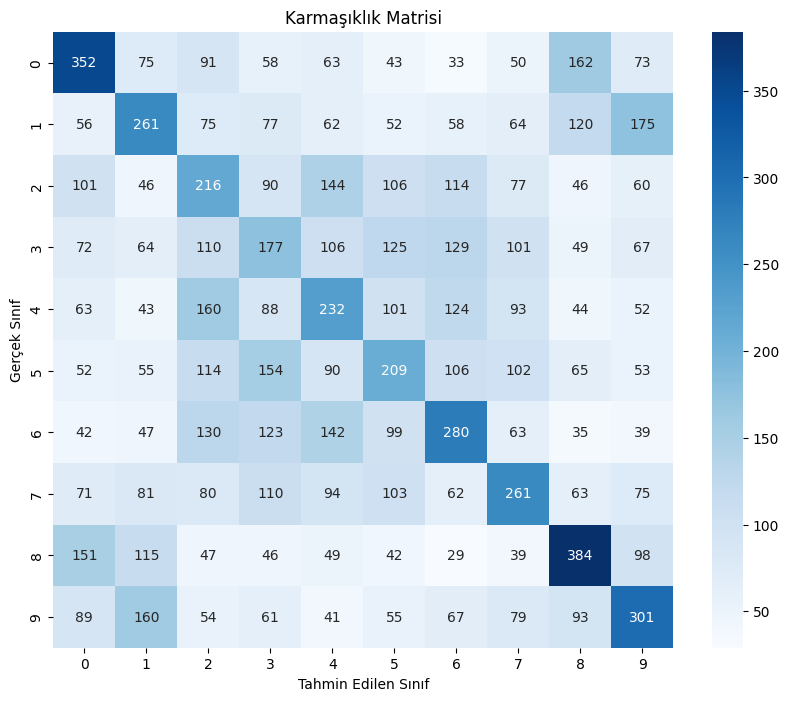

In [16]:
# karmaşıklık matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

In [17]:
# svc modeli oluşturma
svc=SVC().fit(X_train,y_train)

In [18]:
y_pred=svc.predict(X_test)
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

In [20]:
print(f'Doğruluk (Accuracy): {acc:.4f}')
print(f'F1 Skoru: {f1:.4f}')
print(f'Geri Çağırma (Recall): {recall:.4f}')
print(f'Kesinlik (Precision): {precision:.4f}')

Doğruluk (Accuracy): 0.5436
F1 Skoru: 0.5420
Geri Çağırma (Recall): 0.5436
Kesinlik (Precision): 0.5425


In [21]:
# karmaşıklık matrisi
cm = confusion_matrix(y_test, y_pred)
cm

array([[622,  23,  57,  17,  21,  15,  20,  28, 144,  53],
       [ 32, 647,  21,  42,   6,  17,  16,  20,  49, 150],
       [ 85,  24, 407,  89, 133,  62, 112,  50,  23,  15],
       [ 32,  30,  91, 386,  55, 167, 121,  42,  25,  51],
       [ 47,  14, 161,  68, 435,  44, 125,  68,  22,  16],
       [ 22,  14,  87, 197,  71, 431,  84,  49,  21,  24],
       [ 11,  18,  64,  84,  95,  46, 641,  14,  13,  14],
       [ 36,  22,  50,  76,  74,  67,  34, 567,  16,  58],
       [ 83,  66,  16,  22,  20,  19,  15,  18, 688,  53],
       [ 44, 151,  11,  40,  10,  14,  28,  38,  52, 612]], dtype=int64)

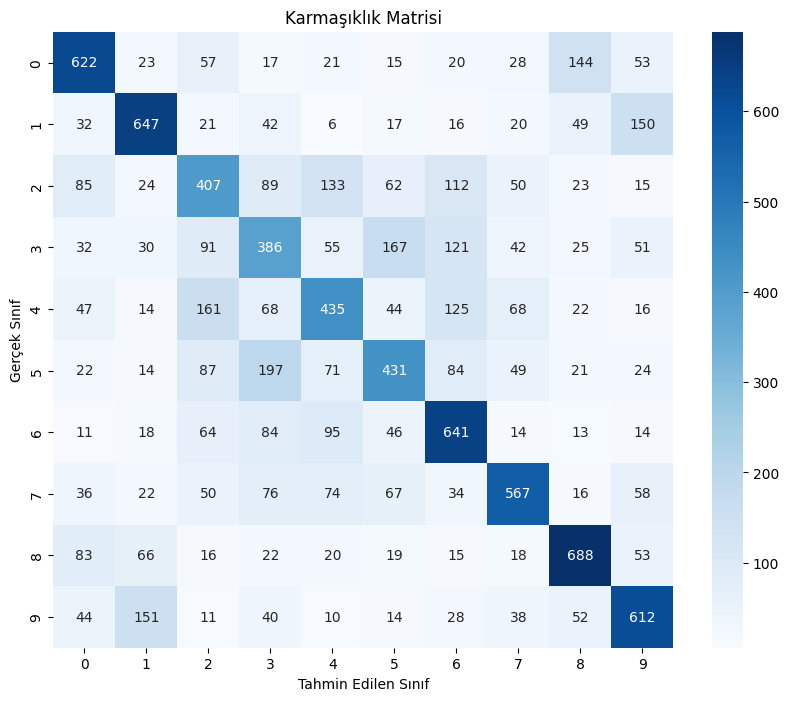

In [22]:
# karmaşıklık matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

In [23]:
# logistic regression modeli oluşturma
logistic_model = LogisticRegression(max_iter=100, solver='lbfgs', multi_class='multinomial', n_jobs=-1)
logistic_model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', n_jobs=-1)

In [24]:
y_pred = logistic_model.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")

Test accuracy: 0.4051


In [26]:
# karmaşıklık matrisi
cm = confusion_matrix(y_test, y_pred)
cm

array([[479,  42,  59,  30,  19,  38,  26,  53, 184,  70],
       [ 60, 494,  21,  28,  22,  41,  37,  53,  78, 166],
       [112,  47, 276,  80, 115,  93, 138,  67,  48,  24],
       [ 42,  60,  96, 235,  56, 218, 127,  48,  45,  73],
       [ 57,  28, 135,  47, 291, 106, 158, 121,  32,  25],
       [ 42,  44,  91, 136,  81, 372,  88,  72,  41,  33],
       [ 15,  34,  73, 107,  98,  95, 489,  39,  23,  27],
       [ 49,  44,  72,  48,  90,  85,  48, 444,  42,  78],
       [184,  67,  20,  20,   9,  53,   8,  19, 515, 105],
       [ 83, 190,  20,  20,  17,  31,  41,  48,  94, 456]], dtype=int64)

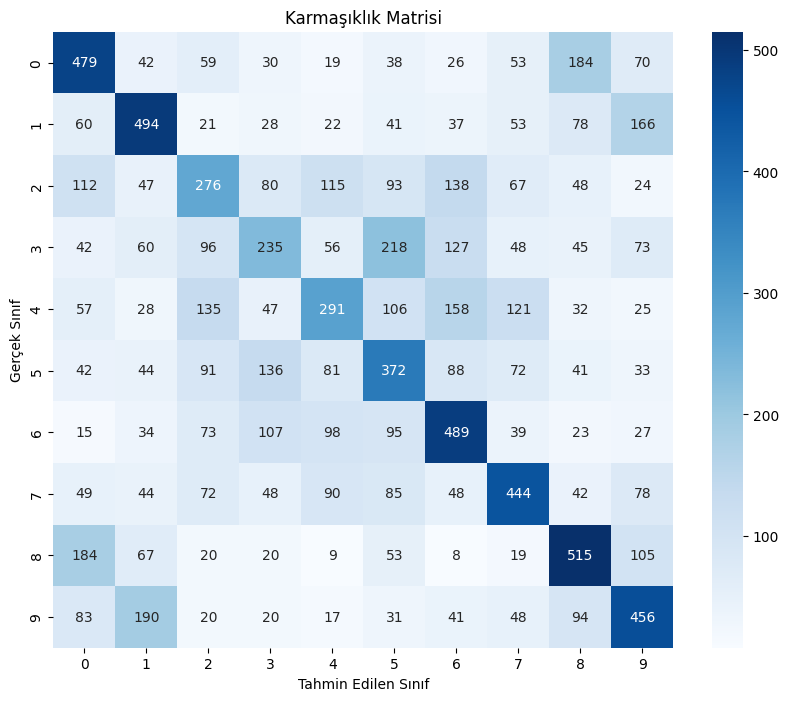

In [27]:
# karmaşıklık matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

In [28]:
# random forest modeli oluşturma
rf=RandomForestClassifier().fit(X_train,y_train)

In [29]:
y_pred=rf.predict(X_test)

acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

In [30]:
print(f'Doğruluk (Accuracy): {acc:.4f}')
print(f'F1 Skoru: {f1:.4f}')
print(f'Geri Çağırma (Recall): {recall:.4f}')
print(f'Kesinlik (Precision): {precision:.4f}')

Doğruluk (Accuracy): 0.4700
F1 Skoru: 0.4666
Geri Çağırma (Recall): 0.4700
Kesinlik (Precision): 0.4655


In [31]:
# Karmaşıklık matrisi
cm = confusion_matrix(y_test, y_pred)
cm

array([[561,  38,  65,  16,  32,  20,  24,  24, 169,  51],
       [ 26, 541,  20,  36,  21,  29,  37,  38,  67, 185],
       [108,  37, 314,  74, 157,  69, 125,  59,  26,  31],
       [ 49,  40,  74, 293,  71, 174, 149,  53,  22,  75],
       [ 50,  26, 151,  53, 406,  42, 137,  88,  29,  18],
       [ 36,  28,  91, 166,  74, 394,  72,  77,  24,  38],
       [  8,  30,  87,  86, 106,  55, 545,  38,  11,  34],
       [ 42,  43,  59,  50,  94,  89,  41, 468,  21,  93],
       [ 90,  88,  15,  23,  26,  28,  10,  28, 621,  71],
       [ 48, 170,  22,  23,  13,  22,  27,  53,  65, 557]], dtype=int64)

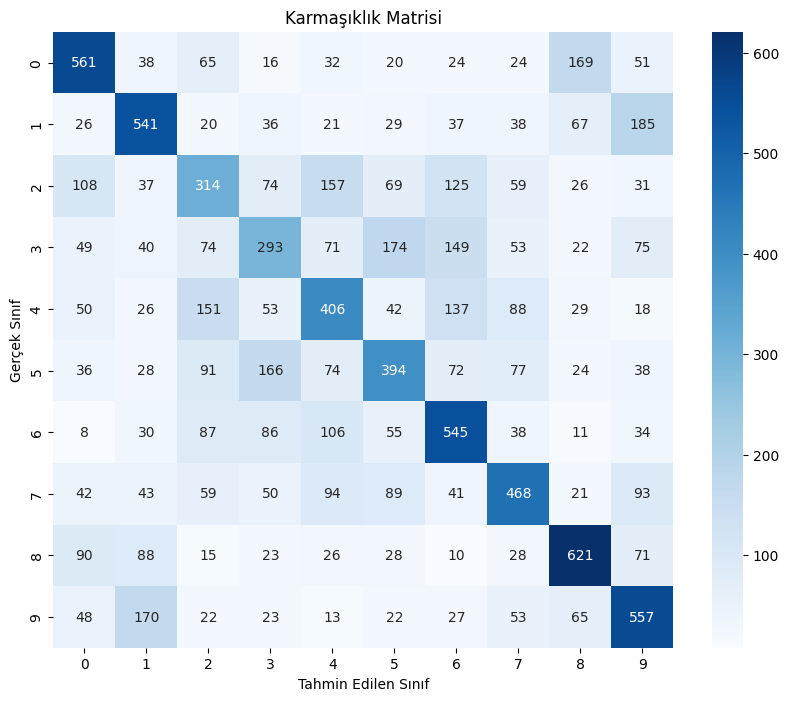

In [32]:
# karmaşıklık matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

# Model eğitimi

In [52]:
# veriyi yükleme
cifar10=tf.keras.datasets.cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [53]:
# veri normalleştirme
X_train = X_train.reshape(-1, 32, 32, 3).astype('float32') / 255.0
X_test = X_test.reshape(-1, 32, 32, 3).astype('float32') / 255.0

In [54]:
# one-hot-encoding
# y_train ve y_test vektörlerinin her elemanı, one-hot encoded formatında bir vektöre dönüştürülür. 
# Örneğin, 0 etiketi [1, 0, 0, 0, 0, 0, 0, 0, 0, 0] haline gelir.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [55]:
# cnn modeli oluşturma
model = Sequential()

In [56]:
# ilk convolutional katmanı
# Conv2D katmanı, 32 adet 3x3 filtre kullanarak giriş görüntülerine konvolüsyon uygular, 
# sonuçları ReLU aktivasyon fonksiyonuyla işler ve padding yöntemi olarak "same" kullanarak çıkış boyutunu girişle aynı tutar.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3),padding='same'))
# MaxPooling2D katmanı, 2x2 boyutundaki bölgelerden maksimum değerleri çıkararak girişin uzamsal boyutlarını yarıya indirir.
# Bu, özellik haritalarının boyutunu azaltır ve hesaplama maliyetini düşürürken önemli bilgileri korur.
model.add(MaxPooling2D((2, 2)))


In [57]:
# ikinci convolutional katmanı
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

In [58]:
# üçüncü convolutional katmanı
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))



In [59]:
# dördüncü convolutional katmanı
model.add(Conv2D(256, (3, 3), activation='relu', padding='valid')) 

In [ ]:
# model.add(Flatten()) => Konvolüsyon katmanlarından gelen çok boyutlu veriyi tek boyutlu bir vektöre dönüştürür.
# Dense, tam bağlantılı bir katmandır ve 64 nöron içerir.L1 ve L2 regularizasyon teknikleri modelin aşırı öğrenmesini (overfitting) engellemeye yardımcı olur.
# Dropout oranı 0.6, yani her eğitim adımında nöronların %60'ı devre dışı bırakılır.
# model.add(Dense(10, activation='softmax')) => Bu katman, modelin son katmanıdır ve 10 sınıflı sınıflandırma problemleri
# için kullanılır. Softmax aktivasyon fonksiyonu, her sınıf için olasılık dağılımı üretir.

In [60]:
# tam bağlantılı katman
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01))) 
model.add(Dropout(0.6))
model.add(Dense(10, activation='softmax'))


In [61]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 6, 6, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 1, 1, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 405,514 (1.55 MB)

 Trainable params: 405,514 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
# modeli derleme
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
             metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),tf.keras.metrics.F1Score()])

In [63]:
# Erken durdurma callback'ini tanımlama
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [64]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test),callbacks=[early_stopping])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 41ms/step - accuracy: 0.2174 - f1_score: 0.2079 - loss: 3.6393 - precision_1: 0.4289 - recall_1: 0.0243 - val_accuracy: 0.4562 - val_f1_score: 0.4320 - val_loss: 1.5666 - val_precision_1: 0.7075 - val_recall_1: 0.1737
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.4412 - f1_score: 0.4309 - loss: 1.6202 - precision_1: 0.6708 - recall_1: 0.1893 - val_accuracy: 0.5404 - val_f1_score: 0.5282 - val_loss: 1.3562 - val_precision_1: 0.7580 - val_recall_1: 0.3405
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 41ms/step - accuracy: 0.5140 - f1_score: 0.5083 - loss: 1.4559 - precision_1: 0.7288 - recall_1: 0.2890 - val_accuracy: 0.5891 - val_f1_score: 0.5770 - val_loss: 1.2626 - val_precision_1: 0.8032 - val_recall_1: 0.3648
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.5639 - f1_score: 0.5591 - loss: 1.3410 - precision_1: 0.7599 - recall_1: 0.3591 - val_accuracy: 0.6096 - val_f1_score: 0.6011 - val_loss: 

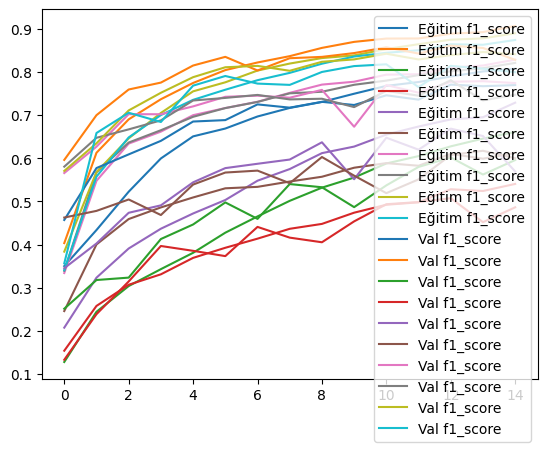

In [68]:
plt.plot(history.history["f1_score"], label="Eğitim f1_score")
plt.plot(history.history["val_f1_score"], label="Val f1_score")
plt.legend()
plt.show()

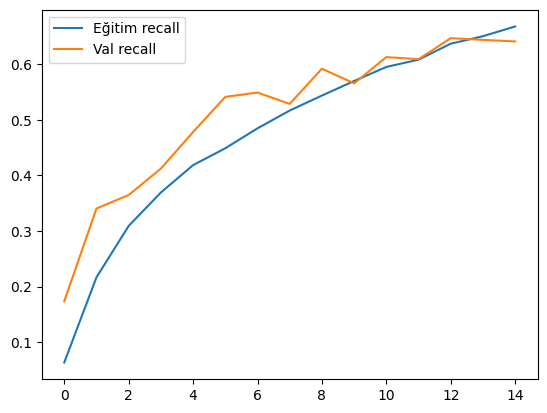

In [71]:
plt.plot(history.history["recall_1"], label="Eğitim recall")
plt.plot(history.history["val_recall_1"], label="Val recall")
plt.legend()
plt.show()

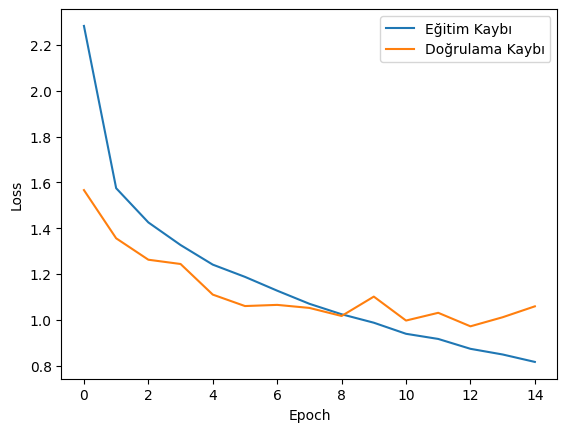

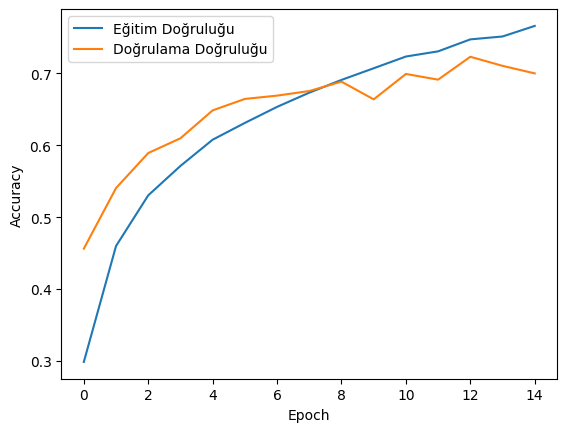

In [72]:
# Eğitim ve doğrulama kaybı
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Eğitim ve doğrulama doğruluğu
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [45]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test),callbacks=[early_stopping])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 37ms/step - accuracy: 0.2279 - loss: 3.6425 - val_accuracy: 0.4105 - val_loss: 1.6448
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.4274 - loss: 1.6497 - val_accuracy: 0.5104 - val_loss: 1.4467
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.5119 - loss: 1.4830 - val_accuracy: 0.5631 - val_loss: 1.3238
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.5603 - loss: 1.3578 - val_accuracy: 0.6146 - val_loss: 1.1990
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.5958 - loss: 1.2670 - val_accuracy: 0.6166 - val_loss: 1.1609
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.6236 - loss: 1.1993 - val_accuracy: 0.6466 - val_loss: 1.1161
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6506 - loss: 1.1330 - val_accuracy: 0.6600 - val_loss: 1.0793
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.6669 -